In [27]:
"""
 ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on. 
● Get all the episode names, whose average rating is more than 8 for every season 
● Get all the episode names that aired before May 2019
 ● Get the episode name from each season with the highest and lowest rating 
● Get the summary for the most popular ( ratings ) episode in every season

"""

'\n ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on. \n● Get all the episode names, whose average rating is more than 8 for every season \n● Get all the episode names that aired before May 2019\n ● Get the episode name from each season with the highest and lowest rating \n● Get the summary for the most popular ( ratings ) episode in every season\n\n'

In [28]:
import requests
import matplotlib.pyplot as plt


In [29]:
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()

In [30]:
# Initialize dictionaries and lists to store the required data for analysis
season_ratings = {}
episode_names_high_ratings = {}
episode_names_before_2019 = []
highest_rated_episodes = {}
lowest_rated_episodes = {}
most_popular_summary_per_season = {}

In [31]:
for episode in data['_embedded']['episodes']:
    season = episode['season']
    rating = episode['rating']['average']
    
    if season in season_ratings:
        season_ratings[season].append(rating)
    else:
        season_ratings[season] = [rating]
        
        
print("Overall ratings for each season:")
for season, ratings in season_ratings.items():
    print("Season", season, ":", ratings)        

Overall ratings for each season:
Season 1 : [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7]
Season 2 : [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5]
Season 3 : [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7]
Season 4 : [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]


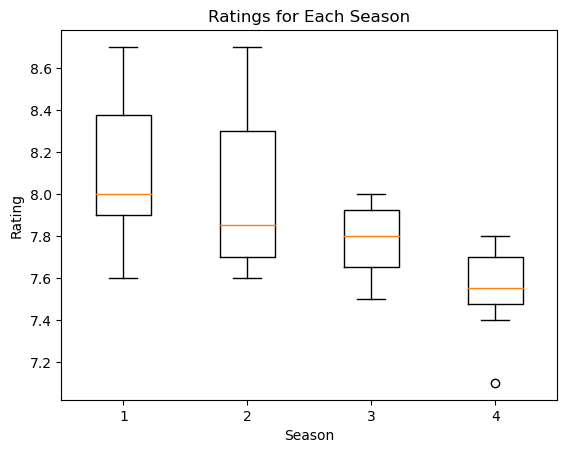

In [32]:
seasons = sorted(season_ratings.keys())
ratings = [season_ratings[season] for season in seasons]

plt.boxplot(ratings, labels=seasons)
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Ratings for Each Season')
plt.show()

In [33]:
#● Get all the episode names, whose average rating is more than 8 for every season
episode_names_high_ratings = {}
for season in season_ratings:
    ratings = season_ratings[season]
    avg_rating = sum(ratings)/len(ratings)
    episode_names_high_ratings[season] = [episode['name'] for episode in data['_embedded']['episodes'] if
                                   episode['season'] == season and float(episode['rating']['average']) > 8]
   # if season['ratings']
for season in episode_names_high_ratings:
    print(f"season {season} ")
    for episode in episode_names_high_ratings[season]:
        print(episode)
    print()

season 1 
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

season 2 
Kiksuya
Vanishing Point
The Passenger

season 3 

season 4 



In [35]:
#● Get all the episode names that aired before May 2019

episodes_before_2019 = [episode['name'] for episode in data['_embedded']['episodes'] if
                        episode['airdate'] < '2019-05-01']


print("Episodes aired before May 2019:")
for episode in episodes_before_2019:
    print(episode)

Episodes aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [36]:
# ● Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for season in season_ratings:
    ratings = season_ratings[season]
    highest_rating = max(ratings)
    lowest_rating = min(ratings)
    highest_rated_episodes[season] = [episode['name'] for episode in data['_embedded']['episodes'] if
                                      episode['season'] == season and float(episode['rating']['average']) == highest_rating]
    lowest_rated_episodes[season] = [episode['name'] for episode in data['_embedded']['episodes'] if
                                     episode['season'] == season and float(episode['rating']['average']) == lowest_rating]

In [41]:
for season in highest_rated_episodes:
    print(f"Season {season} - Highest-rated episode:")
    print(highest_rated_episodes[season][0])
    print(f"Season {season} - Lowest-rated episode:")
    print(lowest_rated_episodes[season][0])
    print()

Season 1 - Highest-rated episode:
The Bicameral Mind
Season 1 - Lowest-rated episode:
The Stray

Season 2 - Highest-rated episode:
Kiksuya
Season 2 - Lowest-rated episode:
Akane No Mai

Season 3 - Highest-rated episode:
Parce Domine
Season 3 - Lowest-rated episode:
Decoherence

Season 4 - Highest-rated episode:
Zhuangzi
Season 4 - Lowest-rated episode:
The Auguries



In [43]:
#● Get the summary for the most popular ( ratings ) episode in every season
most_popular_summary_per_season = {}
for season in season_ratings:
    ratings = season_ratings[season]
    highest_rating = max(ratings)
    most_popular_summary_per_season[season] = [episode['summary'] for episode in data['_embedded']['episodes'] if
                                     episode['season'] == season and float(episode['rating']['average'])==highest_rating]


In [48]:
for season in most_popular_summary_per_season:
    print(f"season {season} most popular summary ")
    print(most_popular_summary_per_season[season][0])
    print()

season 1 most popular summary 
<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>

season 2 most popular summary 
<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>

season 3 most popular summary 
<p>If you're stuck in a loop, try walking in a straight line.</p>

season 4 most popular summary 
<p>God is bored.</p>

